In [4]:
# import libraries
import pydot
import numpy as np
from numpy import loadtxt
from keras import backend as K
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from random import seed, randint
from matplotlib import pyplot

Using TensorFlow backend.
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/abilio/anaconda3/lib/python3.7/site-packages/tenso

In [5]:
# setting numpy print option
np.set_printoptions(suppress=True)

In [6]:
# load the dataset
dataset = loadtxt('desharnais.csv', delimiter=',')
print(dataset.shape)

(77, 12)


In [7]:
# selecting input and output
X = np.delete(dataset, [0,3,5], axis=1)
y = dataset[:,5]

In [8]:
# model creation, training and evaluation
seed(1)
kf = KFold(n_splits=10)
f = 1
all_train_mse = np.array([])
all_train_mae = np.array([])
all_test_mse = np.array([])
all_test_mae = np.array([])
for train_index, test_index in kf.split(X):
    # defining train and test sets for input and output
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # defining model
    rs = randint(2, 13)
    model = RandomForestRegressor(criterion='mse', max_depth=12, n_estimators=100, random_state=rs, verbose=0)
    model.fit(X_train, y_train)  
    
    # making predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # defing metrics values
    train_mse = mse(y_train, pred_train)
    train_mae = mae(y_train, pred_train)
    test_mse = mse(y_test, pred_test)
    test_mae = mae(y_test, pred_test)
    
    # storing each fold metrics in nparray
    all_train_mse = np.append(all_train_mse,train_mse)
    all_train_mae = np.append(all_train_mae,train_mae)
    all_test_mse = np.append(all_test_mse,test_mse)
    all_test_mae = np.append(all_test_mae,test_mae)
    
    print('FOLD: %d' % f)
    print('TRAIN | mse: %.3f, mae: %.3f' % (train_mse, train_mae))
    print('TEST  | mse: %.3f, mae: %.3f' % (test_mse, test_mae))
    f+=1

FOLD: 1
TRAIN | mse: 1418164.258, mae: 786.716
TEST  | mse: 1477410.637, mae: 1065.592
FOLD: 2
TRAIN | mse: 1578950.967, mae: 816.273
TEST  | mse: 3381422.192, mae: 1345.556
FOLD: 3
TRAIN | mse: 1456269.621, mae: 745.194
TEST  | mse: 12975052.100, mae: 2562.247
FOLD: 4
TRAIN | mse: 1504193.919, mae: 787.036
TEST  | mse: 13037773.883, mae: 2914.763
FOLD: 5
TRAIN | mse: 1612804.023, mae: 783.872
TEST  | mse: 6617726.770, mae: 2408.021
FOLD: 6
TRAIN | mse: 968942.917, mae: 672.583
TEST  | mse: 25523585.971, mae: 3687.430
FOLD: 7
TRAIN | mse: 1243481.212, mae: 753.279
TEST  | mse: 8372125.826, mae: 1854.807
FOLD: 8
TRAIN | mse: 1416487.571, mae: 825.753
TEST  | mse: 823156.709, mae: 758.309
FOLD: 9
TRAIN | mse: 1836066.292, mae: 854.570
TEST  | mse: 2033144.020, mae: 1163.571
FOLD: 10
TRAIN | mse: 1208699.460, mae: 736.724
TEST  | mse: 43919171.570, mae: 4791.599


In [15]:
mean_mse_train = np.mean(all_train_mse)
mean_mae_train = np.mean(all_train_mae)
mean_mse_test = np.mean(all_test_mse)
mean_mae_test = np.mean(all_test_mae)

print('RF TRAIN METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_train, mean_mae_train))
print('RF TEST METRICS MEAN AFTER 10 FOLDS')
print('MSE: %.3f | MAE: %.3f' % (mean_mse_test, mean_mae_test))

RF TRAIN METRICS MEAN AFTER 10 FOLDS
MSE: 1424406.024 | MAE: 776.200
RF TEST METRICS MEAN AFTER 10 FOLDS
MSE: 11816056.968 | MAE: 2255.190


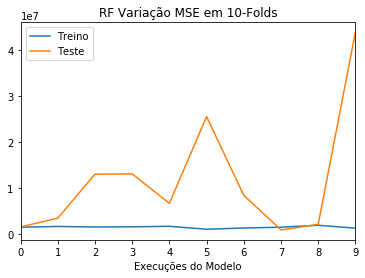

In [16]:
# plot rf mse metric variation
pyplot.title('RF Variação MSE em 10-Folds')
pyplot.plot(all_train_mse, label='Treino')
pyplot.plot(all_test_mse, label='Teste')
pyplot.xlim(0,9)
pyplot.xlabel("Execuções do Modelo")
pyplot.legend()
pyplot.show()

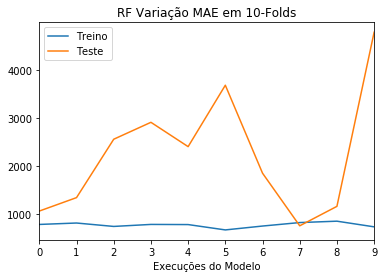

In [17]:
# plot rf mae metric variation
pyplot.title('RF Variação MAE em 10-Folds')
pyplot.plot(all_train_mae, label='Treino')
pyplot.plot(all_test_mae, label='Teste')
pyplot.xlim(0,9)
pyplot.xlabel("Execuções do Modelo")
pyplot.legend()
pyplot.show()